# **Projet pluridisciplinaire**

## **Sujet**  
---

Dans le cadre d’un cours appelé « **Projet pluridisciplinaire** », pour clôturer notre premier semestre de Master 1 Sciences cognitives, nous avons un projet à effectué **sous 5 jours**, à rendre sous 2 formats.
* **Un fichier notebook** : Constitué de nos recherches, hypothèse, analyses et conclusion sur le sujet.
* **Une vidéo** : vidéo de vulgarisation de maximum 4 minutes qui explique une partie de nos résultats. Celle ci doit être adaptée au public et représentée, de manière accessible, fluide et intéressante, nos résultats.

Notre analyse se fait sur des données d’études faites sur des groupes de souris. Le but de cette étude est d’explorer les impacts de différents régimes sur la vieillesse. 

Nous avons **4 groupes** differents : 
* **Jeunes** : 1 groupe de personnes jeunes (3 mois) avec un régime **standard** (10% de gras, 20% de proteines et 70% de carbohydrates)
* **Agés** : 3 groupes de personnes âgées (12 mois) avec différent régime
    - **Ages (Standard)** : personnes agée avec un régime **standard**
    - **Ages (Restrictive diet)** : personnes agéee en sous régime (-20% en quantités que le régime standard, sans dénutriment)
    - **Ages (High fat diet)** : personnes agéee en régime gras (60% de gras, 12% de proteines et 28% de carbohydrates)

Tous les groupes sont étudiés pendant 3 mois avec huit tests qui évaluent chacun : les fonctions motrices, l’anxiété, la mémoire, et l'olfaction ainsi que la taille de l’hippocampe.

## **Table des matières**
---
* [Documentation](#0)
* [1) Exploration des données](#1)
    * [1.1) Lisibilité des données](#1_1)
    * [1.2) Existence de duplicatat](#1_2)
    * [1.3) Recherche des outliers](#1_3)

* [2) Nettoyage des données](#2)
    * [2.1) Gestion des outliers](#2_1)

* [3) Matrice de corrélation](#3)

* [4) Tests statistiques](#4)
    * [4.1) Shapiro-Wilk : vérification de la condition de normalité ](#4_1)
    * [4.2) Levene : vérification de la condition sur l'homogénéité des variances](#4_2)
    * [4.3) Performance de l'ANOVA et Tukey](#4_3)
    * [4.4) Performance de Kurask-Wallis](#4_4)
    * [4.5) Test Post-hoc : Dunn](#4_5)

* [5) Analyse des résultats des test statistiques](#5)

## Documentation <a class="anchor" id="1"></a>
---
**Variables :**

* **id** : (ID) Numéro d'identification des souris
* **group**	: (Traitement) Type de régime alimentaire donné aux souris
* **age_bf** : (age avant le traitement) j
* **age_af** : (age a la fin du traitement) j+3 mois
* **weight_bf**	: (poids avant le traitement)
* **weight_af**	: (poids a la fin du traitement)
* **rotarod_time_tot** : (temps total du test en sec) Temps maximal du test 'rotarod'
* **rotarod_time_rec** : (temps sur le rotarod en sec) Temps pour un sujet au test 'rotarod'
* **gripTest_strenght**	: (Force motrice en newton) 
* **openField_distance** : (distance parcourue en cm) Distance que la souris a parcouru en totalité (centre et périphérie)
* **openField_time_tot** : (temps passé au centre en sec) 
* **openField_middle_time** : (temps passé en périphérie en sec)
* **openField_periphery_time** : (temps total du test en sec.1)
* **maze_time_tot**	: (Temps total du test en sec) Temps maximal du test 'maze'
* **mazeTest_time_open** : (temps bras ouvert) Temps passé dans la partie ouverte de la structure
* **mazeTest_time_close** : (temps bras fermé) Temps passé dans la partie fermée de la structure
* **barnes_nb_error** : (Nombre d'erreur pour le test mémoire) 
* **yMaze_pct_alternance** : (% d'alternance) Pourcentage d'alternance entre les différentes parties de la structure du test 'ymaze'
* **olfaction_habituation_time** : (Phase Habituation: temps pour trouver le cookie non caché (sec)) 
* **olfaction_test_time** : (Phase test: temps pour trouver le cookie caché dans la cage (sec))
* **hippocampus_size** : (hippocampal volume (mm3)) Taille de l'hippocampe des souris

--- 

**Type de test :**
* **Fonctions motrices** : Afin de tester si le type de régime alimentaire a un effet sur les fonctions motrices au cours du vieillissement chez la souris, deux tests ont été effectués : le Rotarod et le Griptest.
    * **Rotarod** : Le test rotarod permet de tester l'endurance, la coordination motrice et l'équilibre des souris. Lors de ce test, l'animal est placé sur une roue dont la vitesse de rotation augmente au cours du test. La mesure prise lors de ce test est la moyenne du temps où l'animal est resté sur l'appareil durant 3 essais. Nos variables dépendantes sont les différents groupes (jeunes, agées, agées avec régime restrictif et agées avec régime gras)

        Nos hypothèses pour ce test sont:

        * **H0** : Il n'y a pas de différence dans l'endurance, la coordination motrice et l'équilibre entre les groupes soumis à différents régimes alimentaires (standard, HFD, restriction calorique).
        * **H1** : Il existe une différence significative dans l'endurance, la coordination motrice et l'équilibre entre les groupes soumis à différents régimes alimentaires.

    * **Test d'aggripement** : Le test permet de tester le pic de force développé par l'animal. Dans le test, la force motrice de l'animal est mesurée en newton ou en grammes : c'est notre variable dépendante. Nos variables indépendantes sont les différents groupes (jeunes, agées, agées avec régime restrictif, agées avec régime gras).

        Nos hypothèses pour ce test sont:
        * **H0 :** Il n'y a pas de différence dans la force motrice entre les groupes soumis à différents régimes alimentaires
        * **H1 :** Il existe une différence dans la force motrice entre les groupes soumis à différents régimes alimentaires

* **Fonctions anxiété** : Afin de tester si le type de régime alimentaire a un effet sur la fonction anxiété au cours du vieillissement chez la souris, deux tests ont été effectués : l'OpenField et le Labyrinthe en croix surélevé.
    * **Openfield** : Le test permet de tester l'activité locomotrice des souris dans un milieu nouveau et anxieux. Si la souris passe plus de temps en périphérie (qui est moins éclairée) c'est qu'elle est anxieuse. La variable dépendante est la moyenne du temps passé en périphérie. Nos variables indépendantes sont les différents groupes (jeunes, âgées, âgées avec régime restrictif, âgées avec régime gras).

        Nos hypothèses pour ce test sont:
        * **H0 :** Il n'y a pas de différence dans le temps passé en périphérie entre les groupes soumis à différents régimes alimentaires
        * **H1 :** Il existe une différence dans le temps passé en périphérie entre les groupes soumis à différents régimes alimentaires

    * **Labyrinthe en croix surélevé** : Le test permet de tester l'anxiété, si la souris passe plus de temps dans les couloirs fermés, elle est plus anxieuse. La variable dépendante est la moyenne du temps passé dans les couloirs fermés. Nos variables indépendantes sont les différents groupes (jeunes, âgées, âgées avec régime restrictif, âgées avec régime gras).
        Nos hypothèses pour ce test sont:
        * **H0 :** Il n'y a pas de différence dans le temps passé dans les couloirs fermés entre les groupes soumis à différents régimes alimentaires.
        * **H1 :** Il existe une différence dans le temps passé dans les couloirs fermés entre les groupes soumis à différents régimes alimentaires


* **Fonction mémoire** : Les tests de la mémoire on pour but de comprendre l’impact qu’à le régime alimentaire sur la vieillesse sur cette fonction cognitive. 2 test ont été effectuées pour tester la mémoire : le test de Barnes et le labyrinthe en Y.
    * **Labyrinthe de Barnes** : Le test de barnes permet de mesurer la mémoire spatiale et la mémoire 1; Il consiste en un cercle fermé contenant 12 passage dont une seul à une sortie. Des repères visuels sont présent tout autour du cercle pour que les souris puissent apprendre ou et la sortie : le protocole dure entre 1 et 5 jours. Dans le test le nombre d’erreur avant d’atteindre la sortie est mesurée (lors du dernier essai) , c’est notre variable dépendante. Nos variable indépendantes sont les différents groupes (jeunes, agées, âgées avec régime restrictif; vieux avec régime gras) 

        Nos hypothese pour ce test sont: 
        * **H0** : Il n'y a pas de différence des performances de mémoire au test de Barnes entre les groupes soumis à différents régimes alimentaires (standard, HFD, restriction calorique).
        * **H1** : Il existe une différence significative des performances de mémoire au test de Barnes entre les groupes soumis à différents régimes alimentaires.
    
    * **Le Labyrinthe en Y** : Le labyrinthe en Y évalue la aussi la mémoire de la souris. C’est un labyrinthe en forme de Y ou sur chaques branche les pattern sur le sol sont différents. Il est basée sur le fait que les rongeurs aiment à explorer un nouvel environnement  et mesure les séquence de mouvement de l’animal.Il est considéré qu’un rongeur à une meilleur mémoire si il alterne entres des branches différentes. La mesure d’alternance est notre variable dépendante de ce test . Plus il est élevée, mieux la souris à de la mémoire. Nos variable indépendantes sont les différents groupes (jeunes, agées, âgées avec régime restrictif; vieux avec régime gras) 

        Nos hypothese pour ce test sont: 
        * **H0** : Il n'y a pas de différence des performances de mémoire au test de Labyrinthe en Y entre les groupes soumis à différents régimes alimentaires (standard, HFD, restriction calorique).
        * **H1** : Il existe une différence significative des performances de mémoire au  test de Labyrinthe en Y  entre les groupes soumis à différents régimes alimentaires.

* **Olfaction** :
    * **Food buried test** : Le test a pour but de comprendre l’impact qu’à le régime alimentaire et la vieillesse sur les capacités d’olfactions. Le test consiste en une phase d’habituation où un gâteau est mis dans une cage pour que la souris puisse trouver le gâteau. Dans la phase test le gâteau est caché. La mesure des capacités olfactives est le temps mis par les souris pour trouver le gâteau.

        Nos hypothèse pour ce test sont:
        * **H0 :** Il n'y a pas de différence des performances olfactives au test de Food buried entre les groupes soumis à différents régimes alimentaires.
        * **H1 :** Il existe une différence significative des performances olfactives au test de food buried entre les groupes soumis à différents régimes alimentaires.

* **Volume de l'hippocampe**
    * IRM : Imagerie cérébrale
---

Fait sur Python 3.12.2.


## 1) Exploration des données <a class="anchor" id="1"></a>
---

In [1]:

# !python3.12 -m pip install pandas matplotlib numpy ipywidgets jupyter xlrd scikit-posthocs

In [2]:
# Importation
import pandas as pd  # Manipulation et mise en forme des données
import matplotlib.pyplot as plt  # Création de graphiques
import numpy as np  # Calculs numériques et manipulation de matrices
import seaborn as sns  # Graphiques avancés et personnalisés
import ipywidgets as widgets  # Widgets interactifs pour notebooks
import statsmodels.api as sm  # Modèles statistiques et analyses

from collections import Counter  # Comptage des occurrences dans des données
from IPython.display import display  # Affichage dans les notebooks
from statsmodels.formula.api import ols  # Régression linéaire et ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # Comparaisons post-hoc
from scipy.stats import shapiro  # Test de normalité
from scipy.stats import levene  # Test d'homogénéité des variances
from scipy.stats import kruskal  # Test non paramétrique pour comparer plusieurs groupes
from sklearn.preprocessing import StandardScaler  # Normalisation des données

#Attention : les graphiques dynamiques ne marchent pas sur un disque dur partitionné. Le fichier possède une version statique et une version dynamique.

In [3]:
#Ouverture et affichage d'une partie du fichier
df_total = pd.read_excel('ProjetInterdisciplinaire_datas_2024 (1).xls', skiprows=1)
df_total.head(30)

,ID,Traitement,age avant le traitement,age a la fin du traitement,poids avant le traitement,poids a la fin du traitement,temps total du test en sec,temps sur le rotarod en sec,Force motrice en newton,distance parcourue en cm,...,temps passé au centre en sec,temps passé en périphérie en sec,Temps total du test en sec,temps bras ouvert,temps bras fermé,Nombre d'erreur pour le test mémoire,% d'alternance,Phase Habituation: temps pour trouver le cookie non caché (sec),Phase test: temps pour trouver le cookie caché dans la cage (sec),hippocampal volume (mm3)
0,1,jeune,3,6,25,25,300,192.0,150,4500.000000,...,80.00,520.00,400,150.0,250.0,3.00,85.0,10.0,90,20.0
1,2,jeune,3,6,26,27,300,177.0,160,4500.000000,...,100.00,500.00,400,160.0,240.0,2.50,80.0,12.0,85,22.0
2,3,jeune,3,6,24,25,300,210.0,140,4800.000000,...,120.00,480.00,400,130.0,270.0,2.75,79.0,8.0,95,19.7
3,4,jeune,3,6,25,26,300,155.0,90,4000.000000,...,110.00,490.00,400,110.0,290.0,2.00,75.0,9.0,90,19.0
4,5,jeune,3,6,28,27,300,160.0,170,4235.000000,...,130.00,470.00,400,145.0,255.0,1.80,88.0,10.0,98,21.0
5,6,jeune,3,6,29,30,300,150.0,125,4100.000000,...,200.00,400.00,400,135.0,265.0,2.00,85.0,11.0,80,20.0
6,7,Ages,12,15,33,35,300,92.0,85,4500.000000,...,48.48,551.60,400,90.0,310.0,7.25,50.0,15.0,150,17.0
7,8,Ages,12,15,32,32,300,NaN,80,4600.000000,...,86.72,513.36,400,75.0,325.0,9.00,65.0,10.0,143,18.0
8,9,Ages,12,15,28,31,300,120.0,75,4445.000000,...,48.56,551.52,400,65.0,335.0,8.00,55.6,7.0,132,17.0
9,10,Ages,12,15,32,34,300,100.0,60,4700.000000,...,35.44,564.64,400,70.0,330.0,7.00,58.3,13.0,127,16.0


In [4]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 21 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   ID                                                                 42 non-null     int64  
 1   Traitement                                                         42 non-null     object 
 2   age avant le traitement                                            42 non-null     int64  
 3   age a la fin du traitement                                         42 non-null     int64  
 4   poids avant le traitement                                          42 non-null     int64  
 5   poids a la fin du traitement                                       42 non-null     int64  
 6   temps total du test en sec                                         42 non-null     int64  
 7   temps sur le rotarod en sec 

In [5]:
df_total.describe()

,ID,age avant le traitement,age a la fin du traitement,poids avant le traitement,poids a la fin du traitement,temps total du test en sec,temps sur le rotarod en sec,Force motrice en newton,distance parcourue en cm,temps total du test en sec.1,temps passé au centre en sec,temps passé en périphérie en sec,Temps total du test en sec,temps bras ouvert,temps bras fermé,Nombre d'erreur pour le test mémoire,% d'alternance,Phase Habituation: temps pour trouver le cookie non caché (sec),Phase test: temps pour trouver le cookie caché dans la cage (sec),hippocampal volume (mm3)
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.0,41.000000,42.000000,42.000000,42.0,42.000000,42.000000,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,21.500000,10.714286,13.714286,31.809524,35.119048,300.0,117.024390,90.285714,4332.283759,600.0,59.857143,540.177143,400.0,71.178571,328.821429,8.103571,61.028571,11.416667,142.333333,16.833333
std,12.267844,3.187519,3.187519,2.948651,11.947451,0.0,74.043395,33.947798,1477.566259,0.0,38.615467,38.615661,0.0,43.060624,43.060624,5.820207,14.843645,2.488796,55.251384,3.712843
min,1.000000,3.000000,6.000000,24.000000,20.000000,300.0,2.000000,40.000000,2300.000000,600.0,9.000000,400.000000,400.0,2.000000,240.000000,0.000000,30.000000,7.000000,80.000000,7.000000
25%,11.250000,12.000000,15.000000,31.000000,25.250000,300.0,51.000000,60.000000,2825.000000,600.0,30.520000,517.480000,400.0,28.500000,308.000000,4.312500,50.725000,10.000000,94.250000,14.900000
50%,21.500000,12.000000,15.000000,33.000000,33.500000,300.0,112.000000,82.500000,4175.156496,600.0,57.000000,543.000000,400.0,78.000000,322.000000,6.900000,61.250000,11.000000,128.500000,18.000000
75%,31.750000,12.000000,15.000000,34.000000,40.750000,300.0,175.000000,113.750000,5386.706395,600.0,82.580000,569.500000,400.0,92.000000,371.500000,9.750000,70.375000,13.750000,196.000000,19.425000
max,42.000000,12.000000,15.000000,35.000000,60.000000,300.0,300.000000,170.000000,7000.000000,600.0,200.000000,591.000000,400.0,160.000000,398.000000,25.000000,88.000000,16.000000,250.000000,22.000000


## 1.1 Lisibilité des données

1. Importation du dataframe sans la première ligne
2. Renommer la deuxième ligne pour avoir le nom du test dans le nom de la variable ainsi qu'un nom plus court
3. Renommer le nom des groupes en un format standard
4. Mettre l'id en tant qu'index du df

In [6]:
rename_dict = {
    'ID': 'id',
    'Traitement': 'group',
    'age avant le traitement': 'age_bf',
    'age a la fin du traitement': 'age_af',
    'poids avant le traitement': 'weight_bf',
    'poids a la fin du traitement': 'weight_af',
    'temps total du test en sec': 'rotarod_time_tot',
    'temps sur le rotarod en sec': 'rotarod_time_rec',
    'Force motrice en newton': 'gripTest_strenght',

    'distance parcourue en cm': 'openField_distance',
    'temps passé au centre en sec': 'openField_middle_time',
    'temps passé en périphérie en sec': 'openField_periphery_time',
    'temps total du test en sec.1': 'openField_time_tot',

    'Temps total du test en sec': 'maze_time_tot',
    'temps bras ouvert': 'mazeTest_time_open',
    'temps bras fermé': 'mazeTest_time_close',

    'Nombre d\'erreur pour le test mémoire ': 'barnes_nb_error',

    '% d\'alternance': 'yMaze_pct_alternance',

    'Phase Habituation: temps pour trouver le cookie non caché (sec)': 'olfaction_habituation_time',
    'Phase test: temps pour trouver le cookie caché dans la cage (sec)': 'olfaction_test_time',
    'hippocampal volume (mm3)': 'hippocampus_size'
}

# Renomme les colonnes
df_total.rename(columns=rename_dict, inplace=True)

# Renomme les lignes de 'group'
df_total.replace('jeune', 'Jeunes (Standard)', inplace=True)
df_total.replace('Ages', 'Ages (Standard)', inplace=True)
df_total.replace('ages en High fat diet', 'Ages (High fat diet)', inplace=True)
df_total.replace('Ages en restriction calorique', 'Ages (Restrictive diet)', inplace=True)

# Remplace l'index de base par la colonne 'id'
df_total.set_index("id", inplace=True)
df_total.sample(10)

,group,age_bf,age_af,weight_bf,weight_af,rotarod_time_tot,rotarod_time_rec,gripTest_strenght,openField_distance,openField_time_tot,openField_middle_time,openField_periphery_time,maze_time_tot,mazeTest_time_open,mazeTest_time_close,barnes_nb_error,yMaze_pct_alternance,olfaction_habituation_time,olfaction_test_time,hippocampus_size
id,,,,,,,,,,,,,,,,,,,,
16,Ages (Standard),12,15,33,34,300,112.0,81,3386.882008,600,70.00,530.08,400,80.0,320.0,6.5,59.2,9.5,126,16.8
12,Ages (Standard),12,15,35,37,300,2.0,82,3970.110277,600,59.52,540.56,400,87.0,313.0,6.5,60.0,12.0,120,18.5
11,Ages (Standard),12,15,35,36,300,78.0,70,4631.972157,600,90.00,510.00,400,77.0,323.0,7.5,56.5,11.0,160,19.0
5,Jeunes (Standard),3,6,28,27,300,160.0,170,4235.000000,600,130.00,470.00,400,145.0,255.0,1.8,88.0,10.0,98,21.0
41,Ages (High fat diet),12,15,32,60,300,12.0,40,2400.000000,600,18.00,582.00,400,15.0,385.0,15.0,41.4,14.0,208,11.9
30,Ages (Restrictive diet),12,15,33,25,300,175.0,130,7000.000000,600,45.00,555.00,400,92.0,308.0,0.0,70.0,16.0,86,20.2
6,Jeunes (Standard),3,6,29,30,300,150.0,125,4100.000000,600,200.00,400.00,400,135.0,265.0,2.0,85.0,11.0,80,20.0
9,Ages (Standard),12,15,28,31,300,120.0,75,4445.000000,600,48.56,551.52,400,65.0,335.0,8.0,55.6,7.0,132,17.0
40,Ages (High fat diet),12,15,33,58,300,47.0,45,2800.000000,600,15.00,585.00,400,7.0,393.0,15.0,40.0,10.0,235,11.0


## 1.2 Existence de duplicatat

On recherche l'existence des doublons pour les supprimer si nécessaire.

In [7]:
len(df_total[df_total.duplicated()])

0

Il n'existe aucun duplicatat dans cette dataframe.

## 1.3 Recherche des outliers

Nous effectuons la visualisation des données sur les valeurs numériques pertinentes de manière intragroupe, c'est à dire qu'on vérifie qu'il n'y ait pas de souris qui ait une donnée aberante sur un test dans son groupe. On exclut donc les colonnes 'group', 'age_bf', 'age_af', 'weight_bf', 'weight_af' et 'hippocampus_size'. Après visualisation, nous préférons ne pas utiliser 'openField_distance' car elle est n'est du même ordre de grandeur.

In [8]:
columns_to_include = ['rotarod_time_rec', 
    'gripTest_strenght', 
    # 'openField_distance', 
    'openField_middle_time', 
    'openField_periphery_time', 
    'mazeTest_time_open', 
    'mazeTest_time_close', 
    'barnes_nb_error', 
    'yMaze_pct_alternance', 
    'olfaction_habituation_time', 
    'olfaction_test_time']

C:\Users\lonta\AppData\Local\Temp\ipykernel_16228\3343376554.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[nb].boxplot(data[columns_to_include], labels=columns_to_include)
C:\Users\lonta\AppData\Local\Temp\ipykernel_16228\3343376554.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[nb].boxplot(data[columns_to_include], labels=columns_to_include)
C:\Users\lonta\AppData\Local\Temp\ipykernel_16228\3343376554.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[nb].boxplot(data[columns_to_include], labels=columns_to_include)
C:\Users\lonta\AppData\Local\Temp\ipykernel_16228\3343376554.py:10: Matplotl

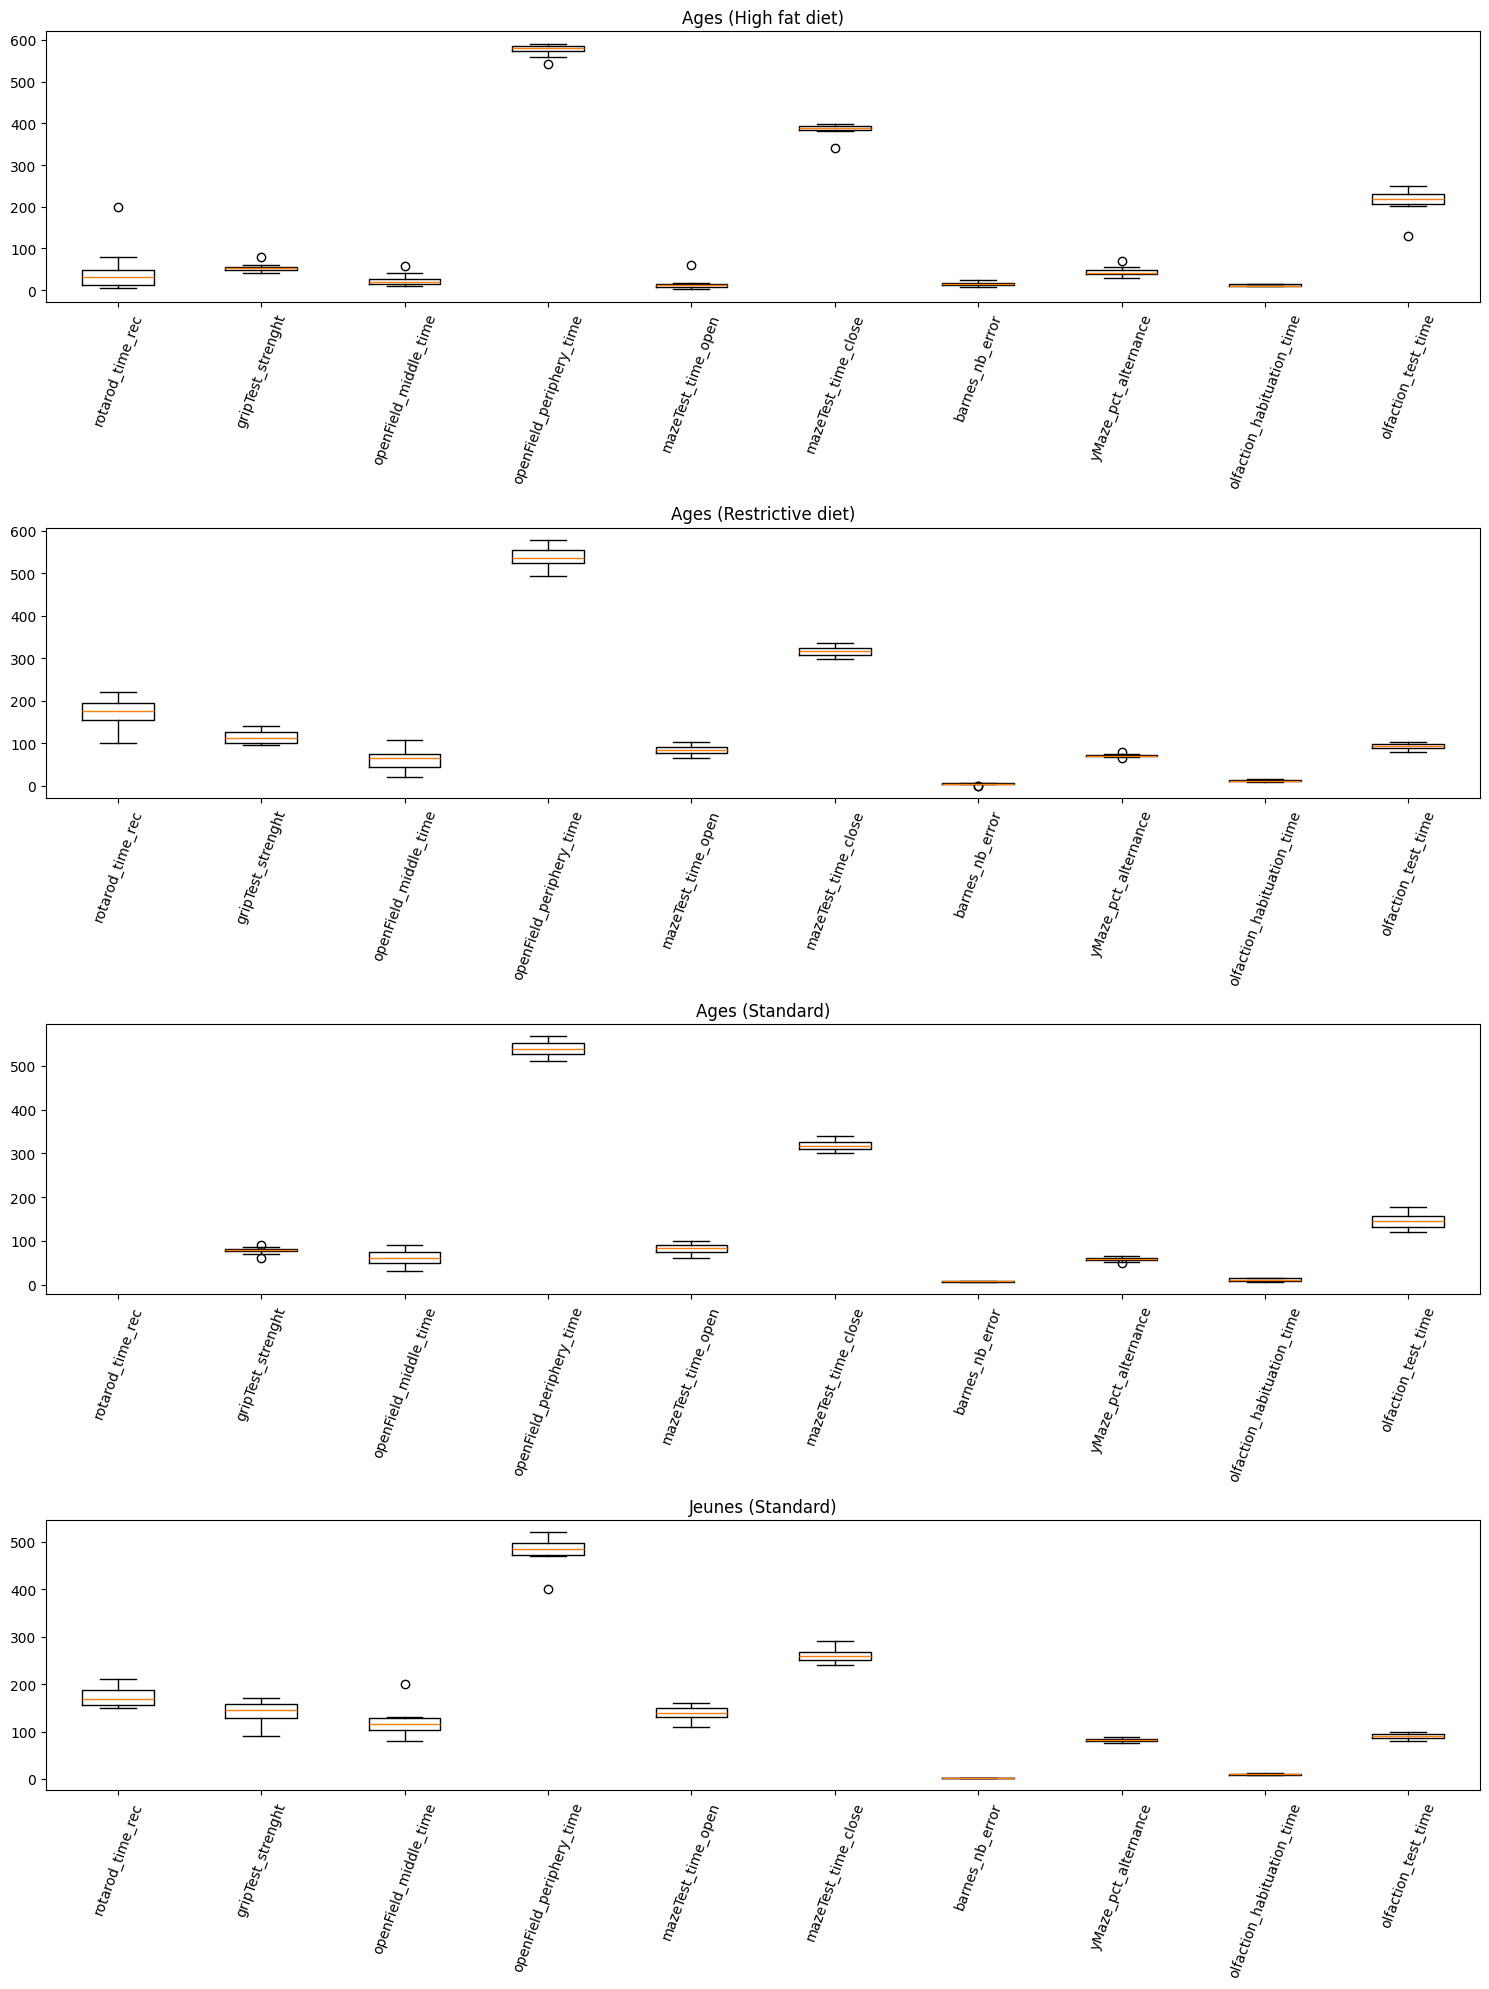

In [9]:
# Fonction statique pour générer le boxplot
# Sélectionnez les colonnes spécifiques
selected_columns = df_total.groupby('group')

#Affichage graphique
fig, axs = plt.subplots(4, 1, figsize=(15,20))
nb = 0 #compteur

for group, data in selected_columns :
    axs[nb].boxplot(data[columns_to_include], labels=columns_to_include)
    axs[nb].set_title(group)
    axs[nb].tick_params(axis='x', rotation=70)
    nb += 1

plt.tight_layout()

In [10]:
# # Fonction dynamique pour générer le boxplot
# def plot_boxplot(group_name):

#     filtered_df = df_total[df_total['group'] == group_name]
#     id_values = filtered_df['id'].values

#     filtered_df = filtered_df.drop(columns=['group', 'id', 'age_bf', 'age_af','rotarod_time_tot', 'openField_time_tot', 'maze_time_tot'])
    
#     # Standardiser les valeurs
#     scaler = StandardScaler()
#     standardized_df = pd.DataFrame(scaler.fit_transform(filtered_df), columns=filtered_df.columns)
    
#     # Transposer le DataFrame
#     transposed_df = standardized_df.T
    
#     plt.figure(figsize=(13, 4))
    
#     # Boucler sur chaque colonne pour tracer les lignes avec les étiquettes appropriées
#     for i, column in enumerate(transposed_df.columns):
#         plt.plot(transposed_df.index, transposed_df[column], marker='o', label=id_values[i])
    
#     plt.xlabel('Test')
#     plt.ylabel('Valeurs standardisé')
#     plt.title(f'Résultat standardisé pour les souris du groupe : {group_name}')
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.grid(True)
#     plt.xticks(rotation=75)
#     plt.show()

# children = []

# for group in df_total["group"].unique():
#     out = widgets.Output()  # Widget pour afficher du contenu
#     with out:
#         plot_boxplot(group)
#     children.append(out)

# tab = widgets.Tab()
# tab.children = children

# for i, group_name in enumerate(df_total["group"].unique()):
#     tab.set_title(i, group_name)

# display(tab)

**Analyse du graphique :**
Tous les groupes ont des outliers cependant la groupe 'Ages (High fat diet)' en a presque sur toutes ces colonnes et assez loin des autres résultats. De plus il manque une ou plusieurs valeurs dans la colonne 'rotarod_time_rec' du groupe 'Age (Standard)'. Hormis cela, le dataset semble plutôt propre. 

On va modéliser : 
- 3 graphique en ligne pour chaque groupe contenant les scores aux tests pour chaque souris du groupe
- 1 graphique en ligne contenant la moyenne des groupes pour chaque test
Cela permet de voir les résultats aux tests de chaque souris et d'avoir une idée globale des scores de chaque groupe, pour les comparer aux autres groupes.

## 2) Nettoyage des données
---

### 2.1 Gestion des outliers

In [ ]:
# Fonction pour générer les 3 graphiques en ligne contenant les scores aux tests pour chaque souris du groupe
def plot_boxplot(group_name):

    filtered_df = df_total[df_total['group'] == group_name]
    id_values = filtered_df['id'].values

    filtered_df = filtered_df.drop(columns=['group', 'id', 'age_bf', 'age_af','rotarod_time_tot', 'openField_time_tot', 'maze_time_tot'])
    
    # Standardiser les valeurs
    scaler = StandardScaler()
    standardized_df = pd.DataFrame(scaler.fit_transform(filtered_df), columns=filtered_df.columns)
    
    # Transposer le DataFrame
    transposed_df = standardized_df.T
    
    plt.figure(figsize=(13, 4))
    
    # Boucler sur chaque colonne pour tracer les lignes avec les étiquettes appropriées
    for i, column in enumerate(transposed_df.columns):
        plt.plot(transposed_df.index, transposed_df[column], marker='o', label=id_values[i])
    
    plt.xlabel('Test')
    plt.ylabel('Valeurs standardisé')
    plt.title(f'Résultat standardisé pour les souris du groupe : {group_name}')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.xticks(rotation=75)
    plt.show()

children = []

for group in df_total["group"].unique():
    out = widgets.Output()  # Widget pour afficher du contenu
    with out:
        plot_boxplot(group)
    children.append(out)

tab = widgets.Tab()
tab.children = children

for i, group_name in enumerate(df_total["group"].unique()):
    tab.set_title(i, group_name)

display(tab)

On identifie visuellement que la souris n°33 dans le groupe 'Ages (High fat diet) a des performances très différentes des autres.

In [ ]:
df_total.loc[df_total.index == 33]

Statistiquement nous l'enlevons car elles perturbent nos données, cependant biologiquement elle a un poid bien inférieur au poids moyen du groupe, ce qui ne l'a rend pas représentative. Elle pourrait ne pas bien avoir mangé ou encore avec un métabolisme plus rapide que les autres.

In [ ]:
df_total = df_total[df_total.index != 33]

### 2.2) Corrélation entre les groupes


In [ ]:
# Calculer la moyenne par groupe pour chaque colonne
grouped_means = df_total[df_total.index != 33].groupby('group').mean()
grouped_means.drop(columns=['rotarod_time_tot', 'openField_time_tot', 'maze_time_tot'])

# Centrer et réduire les moyennes
centered_reduced_means = (grouped_means - grouped_means.mean()) / grouped_means.std()

# Afficher les moyennes centrées réduites avec matplotlib
fig, ax = plt.subplots(figsize=(15, 5))

# Tracer les moyennes centrées réduites pour chaque groupe
for group in centered_reduced_means.index:
    ax.plot(centered_reduced_means.columns, centered_reduced_means.loc[group], marker='o', label=group)

# Ajouter des étiquettes et une légende
ax.set_xlabel('Tests')
ax.set_ylabel('Moyenne des scores par groupe centrée réduite')
ax.set_title('Moyenne des scores par groupe centrée réduite pour chaque test')
plt.xticks(rotation=70)
ax.legend(title='Group')
plt.ylim() 
plt.grid()

# Afficher le graphique
plt.show()

KeyError: 'group'

### Matrice de corrélation

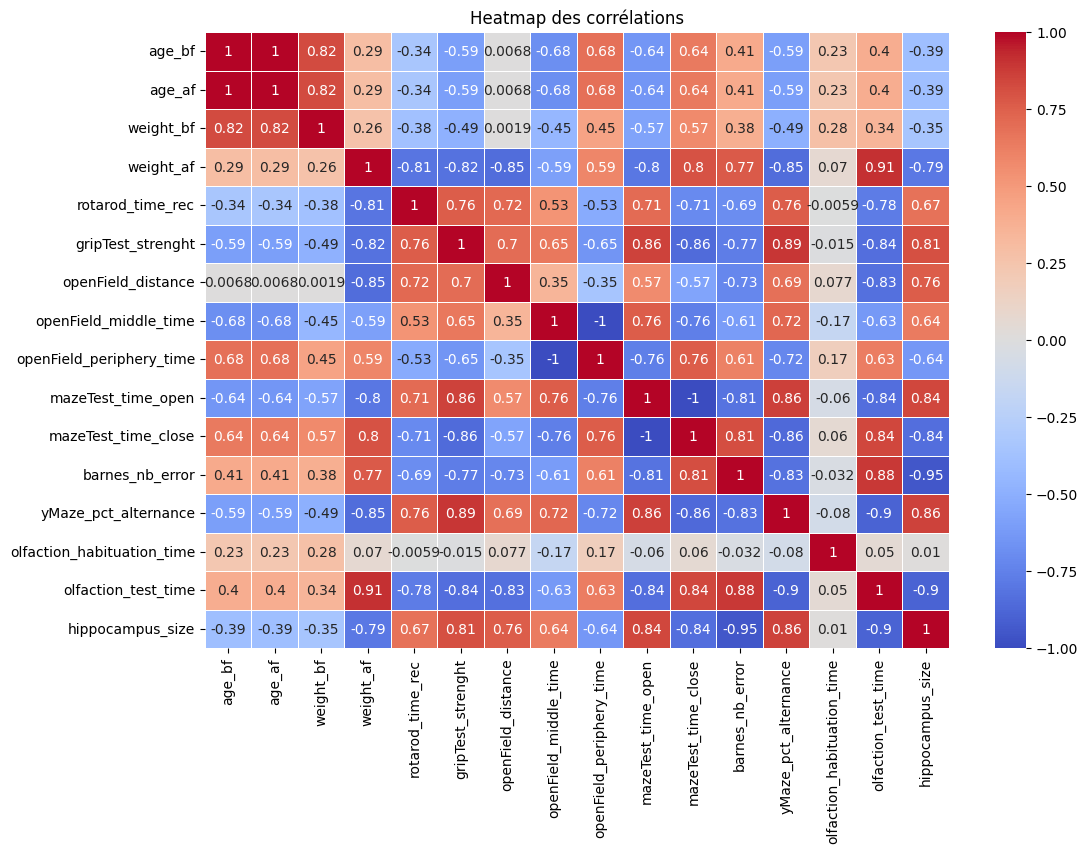

In [ ]:
#Colonnes non pertinentes
numeric_columns = df_total.drop(columns=['rotarod_time_tot', 'openField_time_tot', 'maze_time_tot']).select_dtypes(include='number').columns

#Affichage graphique : heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_total[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap des corrélations')
plt.show()

**Analyse de la matrice** : 

Le poid après le régime particulier, c'est à dire l'impact du régime est **très fortement corrélé** (>|.79|) sur plusieurs tests :
- **Négativement** :
    - **rotarod_time_rec** : les souris légères passent plus de temps sur le rotarod, elles sont plus endurantes
    - **gripTest_streght** : les souris légères ont une plus grande force de traction
    - **openField_distance** : les souris légères parcourent de plus longues distances 
    - **mazeTest_time_open** : les souris légères sont moins anxieuses
    - **yMaze_pct_alternance** : les souris légères ont une meilleure mémoire spatiale
    - **hippocampus_size** : les souris légères ont un hippocampe de plus grande taille

- **Positivement** : 
    - **mazeTest_close** : les souris les plus grosses sont très anxieuses
    - **olfaction_test_time** : les souris les plus grosses ont une meilleure olfaction
 
Ainsi les souris les plus légères semblent avoir de meilleurs aptitudes en ayant plus fortes, en étant plus curieuses et en ayant une meilleure mémoire que les souris les plus grosses, qu'importe leur âge, le poid semblent influencés ces test fortement.

## 4. Tests statistiques

Nous avons fait une analyse de variance sur tous nos tests pour comparer savoir si il y a une différence significative entre les différents groupes. L'ANOVA analyse les **variances intergroupes** et **intragroupes** pour savoir si c’est bien les variances intergroupes qui diffèrent comparés aux variances intragroupes.

Pour performer une ANOVA nos données doivent répondre à **3 conditions** :
- **Indépendance des groupes**
- **Distribution normale des données de chaque groupe**
- **Variance de groupes homogènes**


L'indépendance des groupes est induite par la variable 'group' qui regroupe chaque groupe de manière catégorielle en des groupes distincts : Jeunes (Standard), Ages (Standard), Ages (Restrictive diet), Ages (High fat diet). Pour tester la **normalité** nous utiliserons le test de **Shapiro-Wilk**, pour tester **l’homogénéité** nous utiliserons le test de **Levene** car il est plus adaptés pour les petit échantillons. 

On performe alors une **ANOVA** sur les tests qui passents ces conditions et le test de **Kruskal-Wallice** qui va comparer les rangs de données sur des données non-paramétriques. Il permet comme l’ANOVA de savoir si il existe des différences significatives entre les groupes. 


Pour voir où sont les différences entre les groupes nous utiliserons deux tests post hoc : Tukey et Dunn.
Pour les tests avec **ANOVA** nous utiliserons le test de **Tukey** qui compare les moyennes de chaques paires. 
Pour les tests ayant passer le test de **Kruskal Wallice** nous utiliserons le test de **Dunn** qui est adapté aux données non paramétriques.

### 4.2 Shapiro-Wilk : vérification de la condition de normalité pour l'ANOVA

In [ ]:
def norm_shapiro(data):
    list_provisoire = []
    list_name_shapiro_ok = []

    print("\nShapiro : \n",
          "H0 : Les données suivent une distribution normale (H0 non rejetée). \n",
          "H1 : Les données ne suivent pas une distribution normale (H0 rejetée). \n")

    for column in data.columns:
        if column != "group":
            print(f"--------------------- TEST : {column} ---------------------")
            for group, group_data in data.groupby("group"):
                print(f"{group} : ")
                stat, p_value = shapiro(group_data[column])
                if p_value > 0.05:
                    list_provisoire.append(column)
                    print(f"    OK (H0 non-rejetée) | {group} | Shapiro : {stat}, P-value : {p_value} \n")
                else:
                    print(f"    NO (H0 rejetté) | {group} |  Shapiro : {stat}, P-value : {p_value} \n")

    occurrences = Counter(list_provisoire)
    for value, count in occurrences.items():
        if count == 4:
            list_name_shapiro_ok.append(value)
    return np.unique(list_name_shapiro_ok)

In [ ]:
columns_to_test = ['group','rotarod_time_rec', 
    'gripTest_strenght', 
    'openField_distance', 
    'openField_middle_time', 
    'openField_periphery_time', 
    'mazeTest_time_open', 
    'mazeTest_time_close', 
    'barnes_nb_error', 
    'yMaze_pct_alternance', 
    'olfaction_habituation_time', 
    'olfaction_test_time']

list_name_shapiro_ok = norm_shapiro(df_total[columns_to_test])

### 4.2 Levene : vérification de la condition sur l'homogénéité des variances pour l'ANOVA

In [ ]:
def homogeneity_levene(test_name):
    list_name_levene = []

    print("Levene : \n",
          "H0 : Les variances des groupes sont homogènes (H0 non rejetée). \n",
          "H1 : Les variances des groupes ne sont pas homogènes (H0 rejetée). \n")

    groupes = [group_data for group_name, group_data in df_total.groupby("group")]

    for name in test_name:
        # Extraire les valeurs pour chaque test
        group_values = [data[name] for data in groupes]
        print(f"\nTest : {name}")
        # Réaliser le test de Levene
        stat, p_value = levene(*group_values)

        if p_value > 0.05:
            print(f"    OK | Levene : {stat}, P-value : {p_value}")
            list_name_levene.append(name)
        else:
            print(f"    NO | Levene : {stat}, P-value : {p_value}")

    return list_name_levene

list_name_levene = homogeneity_levene(list_name_shapiro_ok)

Levene : 
 H0 : Les variances des groupes sont homogènes (H0 non rejetée). 
 H1 : Les variances des groupes ne sont pas homogènes (H0 rejetée). 



KeyError: 'group'

## 4.3 Performance de l'ANOVA et Tukey

In [ ]:
def anova(list_name_levene, df=df_total):
    anova_results = {}
    tukey_results = {}

    for test in list_name_levene:
        # Créer le modèle OLS
        model = ols(f'{test} ~ group', data=df).fit()
        # Effectuer l'ANOVA
        anova_table = sm.stats.anova_lm(model, typ=2)

        # Renommer les colonnes en français
        anova_table.columns = ['Somme des carrés', 'Degrés de liberté', 'Moyenne des carrés', 'F']

        # Ajouter la p-value de manière claire
        anova_table['p-value'] = anova_table['F'].apply(lambda x: sm.stats.anova_lm(model, typ=2).loc['group', 'PR(>F)'])

        # Stocker les résultats
        anova_results[test] = anova_table

        # Afficher les résultats
        print(f"Résultats de l'ANOVA pour {test}:")
        print(anova_table)
        print("\n")

        # Vérifier la p-value
        p_value = anova_table['p-value']['group']
        if p_value < 0.05:
            # Effectuer le test post-hoc de Tukey
            tukey = pairwise_tukeyhsd(df[test], df['group'], alpha=0.05)
            # Stocker les résultats
            tukey_results[test] = tukey
            # Afficher les résultats
            print(f"Résultats du test de Tukey HSD pour {test}:")
            print(tukey)
            print("\n")

    return anova_results, tukey_results

### 4.4 Performance de Kruskal Wallis

In [ ]:
# # def kruskal_wallis(list_levene):
# list_kruskal_wallis = ['rotarod_time_rec', 'gripTest_strenght']
# # list_kruskal_wallis = NOMDETOUTELESCOLONNES - list_name_levene : 
# for test in list_kruskal_wallis:
#     from scipy.stats import kruskal# Préparer les données par groupe
#     groups = [df_total[df_total['group'] == group][test] for group in df_total['group'].unique()]

#     # Appliquer le test de Kruskal-Wallis
#     stat, p = kruskal(*groups)
#     print(f"Statistique Kruskal-Wallis : {stat}")
#     print(f"p-value : {p}")

# # kruskal_wallis(list_levene)



In [ ]:
list_kruskal_wallis = [col for col in columns_to_test if col not in list_name_levene]

def kruskal_wallis(list_kruskal_wallis, df=df_total):
    for test_name in list_kruskal_wallis:
        # Préparer les données par groupe
        groups = [df_total[df_total['group'] == group][test_name] for group in df_total['group'].unique()]

        stat, p_value = kruskal(*groups)

        print(f"\nTest : {test_name}")
        if p_value > 0.05:
            print(f"    OK | Kruskal : {stat}, P-value : {p_value}")
        else:
            print(f"    NO | Kruskal : {stat}, P-value : {p_value}")
            

kruskal_wallis(list_kruskal_wallis)

KeyError: 'group'

### 4.5 Test post-hoc : Dunn

In [ ]:
# # Test post-hoc Tukey pour significativité entre groupes
# tukey = pairwise_tukeyhsd(endog=df_total['rotarod_time_rec'], groups=df_total['group'], alpha=0.05)
# print(tukey)

In [ ]:
# # Affichage des moyennes avec significativité trouvé dans l'ANOVA
# fig, ax = plt.subplots(figsize=(8, 6))

# # Bar plot des moyennes
# bars = ax.bar(group_means.index, group_means.values, color='lightblue', edgecolor='black')

# # Ajout des annotations pour significativité
# comparisons = tukey._results_table.data[1:]  # Récupère les résultats post-hoc sans le header
# significant_pairs = [comp for comp in comparisons if comp[4] < 0.05]  # Paires significatives

# # Ajouter les annotations pour les paires significatives
# y_max = max(group_means.values)
# for pair in significant_pairs:
#     group1, group2, _, _, p_value = pair
#     x1, x2 = group_means.index.get_loc(group1), group_means.index.get_loc(group2)
#     y = y_max + 5
#     ax.plot([x1, x1, x2, x2], [y, y + 1, y + 1, y], lw=1.5, color='black')  # Barre de liaison
#     ax.text((x1 + x2) / 2, y + 1, f"p={p_value:.3f}", ha='center', va='bottom', color='black')

# # Personnalisation du graphique
# ax.set_title("ANOVA des temps de rotarod par groupe")
# ax.set_ylabel("Temps moyen (rotarod)")
# ax.set_xlabel("Groupes")
# plt.tight_layout()

# plt.show()

## 5) Analyse des résultats des tests statistiques

H0 : Les régimes alimentaires n'ont pas d'impact sur le vieillissement normal(tests)
H1 : Les régimes alimentaires ont un impact sur le vieillissement normal


Les régimes suivent les mêmes courbes qu'un vieillissement normal, réussi, pathologique.
On voit bien un déclin entre le group jeune et age standard, c'ets un vieillisement normal.
On voit cependant que le group restrictive diet a un déclin bcp moins accentué, on peut penser que c'est un vieillissement réussi.
On voit que le régime gras, ce qui se rapproche d'un vieillissmeen tpathologique.



**Made with love by <3** : Anya FONTENOY, Fantine FIGUET, Myriam RENIEZ, Lilas ONTANEDA

**On Github** : @LilasOnC 